In [68]:
#Classification because the goal is to classify individuals into one of these 
#two categories rather than predicting a continuous value

import pandas as pd

df = pd.read_csv('data.csv', header=0)

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
num_observations = df.shape[0]

missing_values = df.isnull().sum()

unique_values = df.nunique()

num_observations, missing_values, unique_values

#Categorical Variables: sex, cp, fbs, restecg, exng, slp, caa, thall
#Continuous Variables: age, trtbps, chol, thalachh, oldpeak

(303,
 age         0
 sex         0
 cp          0
 trtbps      0
 chol        0
 fbs         0
 restecg     0
 thalachh    0
 exng        0
 oldpeak     0
 slp         0
 caa         0
 thall       0
 output      0
 dtype: int64,
 age          41
 sex           2
 cp            4
 trtbps       49
 chol        152
 fbs           2
 restecg       3
 thalachh     91
 exng          2
 oldpeak      40
 slp           3
 caa           5
 thall         4
 output        2
 dtype: int64)

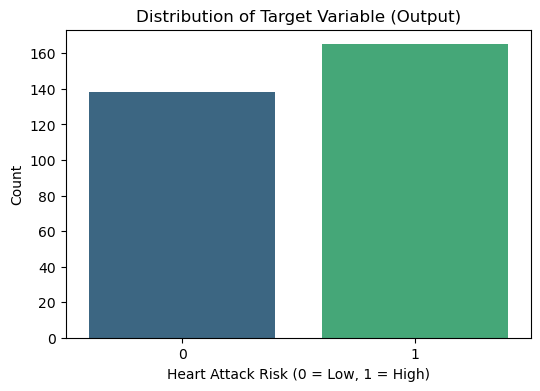

In [72]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df["output"], palette="viridis")
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable (Output)")
plt.show()

# No, the dataset isnt completely balanced because there isnt an equal representation of
#people prone to heart attacks and people who are not

# An imbalanced dataset can lead to a biased model and accuracy measures may be misleading
# but it isnt the end of the world if it is imbalanced

# There are resampling techniques such as oversaompling the minority class or undersampling
# the majority class. or simply assining higher values to minorit class in model training

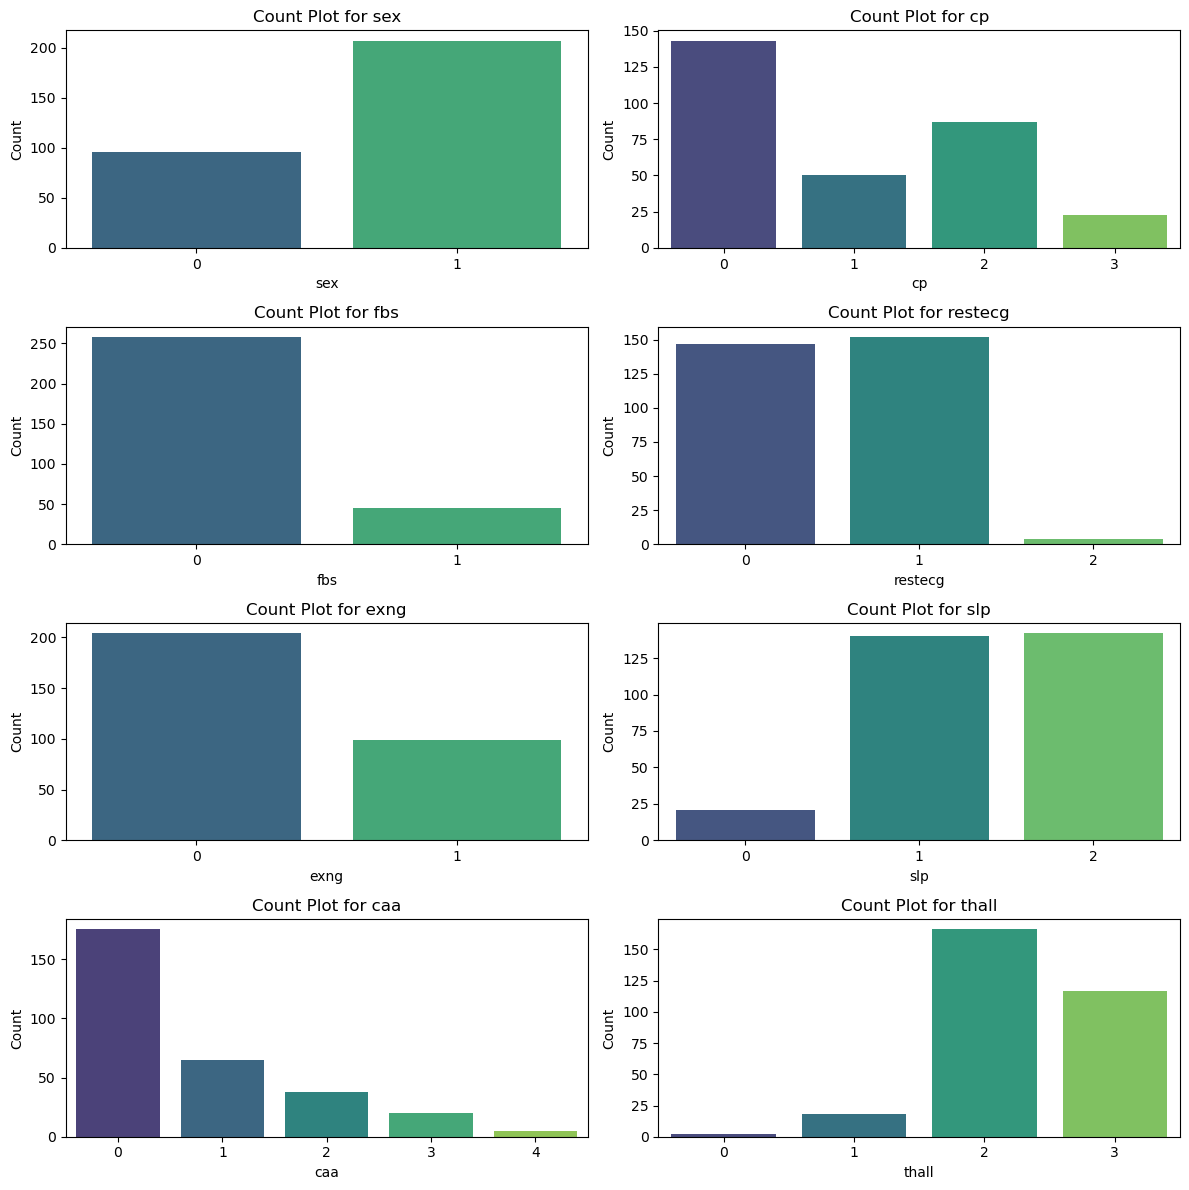

In [74]:
# Set up subplots for categorical variables
categorical_cols = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Create count plots for each categorical variable
for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=df[col], palette="viridis", ax=ax)
    ax.set_title(f"Count Plot for {col}")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

# Sex: More males than females in the dataset.
# Chest Pain Type (cp): Varies, with some types more common.
# Fasting Blood Sugar (fbs): Majority have normal fasting blood sugar.
# Resting ECG (restecg): Most individuals fall into category 0 or 1.
# Exercise-Induced Angina (exng): Most individuals do not have exercise-induced angina.
# Slope (slp): Majority belong to category 1 or 2.
# Major Vessels (caa): Varies, with 0 being the most common.
# Thalassemia Rate (thall): Mostly falls into categories 2 and 3.

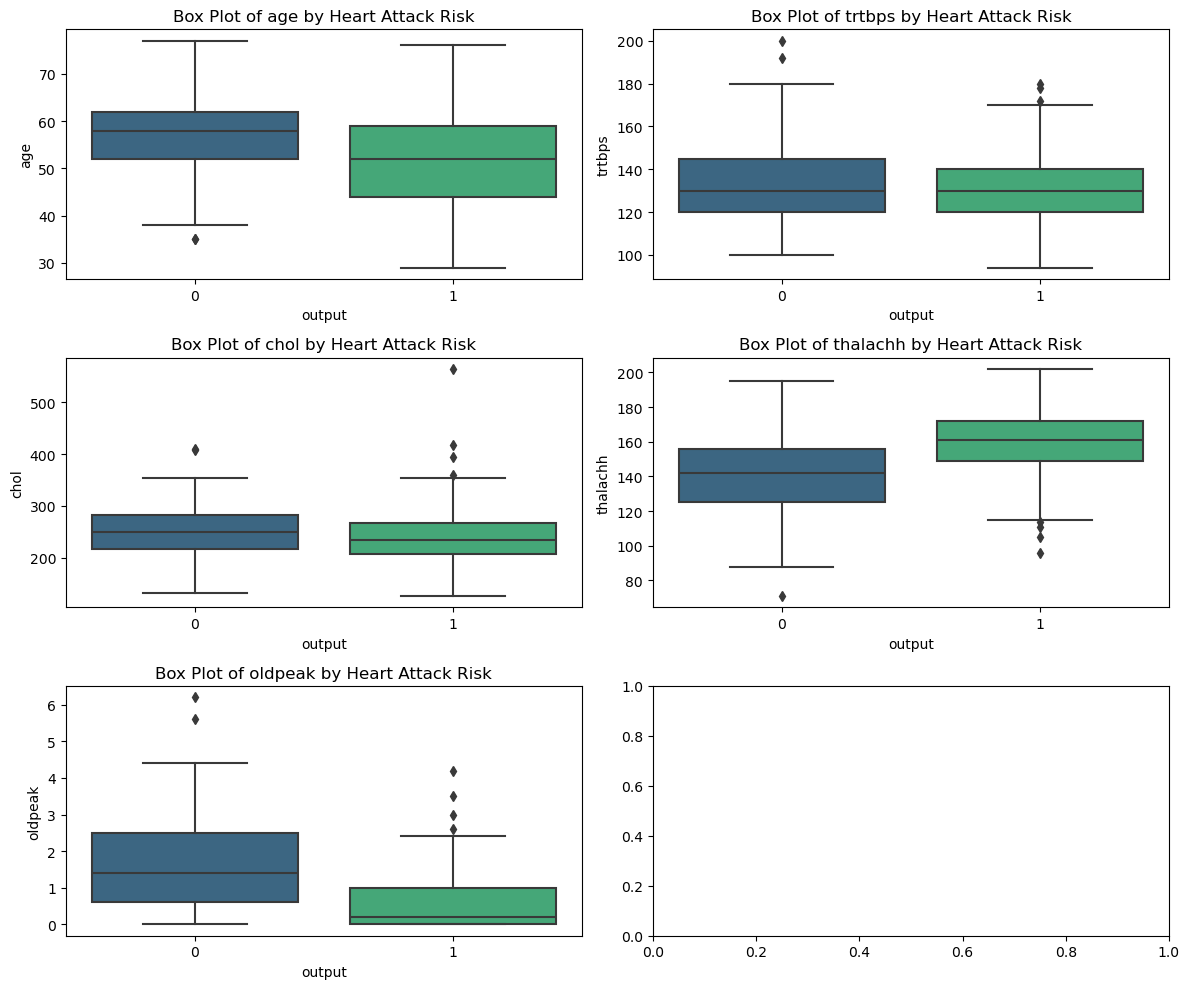

In [76]:
# Set up subplots for box plots
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Create box plots for each continuous variable
for col, ax in zip(continuous_cols, axes.flatten()):
    sns.boxplot(x=df["output"], y=df[col], palette="viridis", ax=ax)
    ax.set_title(f"Box Plot of {col} by Heart Attack Risk")

plt.tight_layout()
plt.show()

# Age: The median age is slightly higher for those with a high heart attack risk.
# Resting Blood Pressure (trtbps): Similar distribution across both classes, but some outliers exist.
# Cholesterol (chol): Highly spread out, with some extreme values.
# Maximum Heart Rate (thalachh): Higher heart rates seem to be more common in the lower-risk group.
#Oldpeak (previous peak): Higher values are associated with a greater risk of heart attack.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

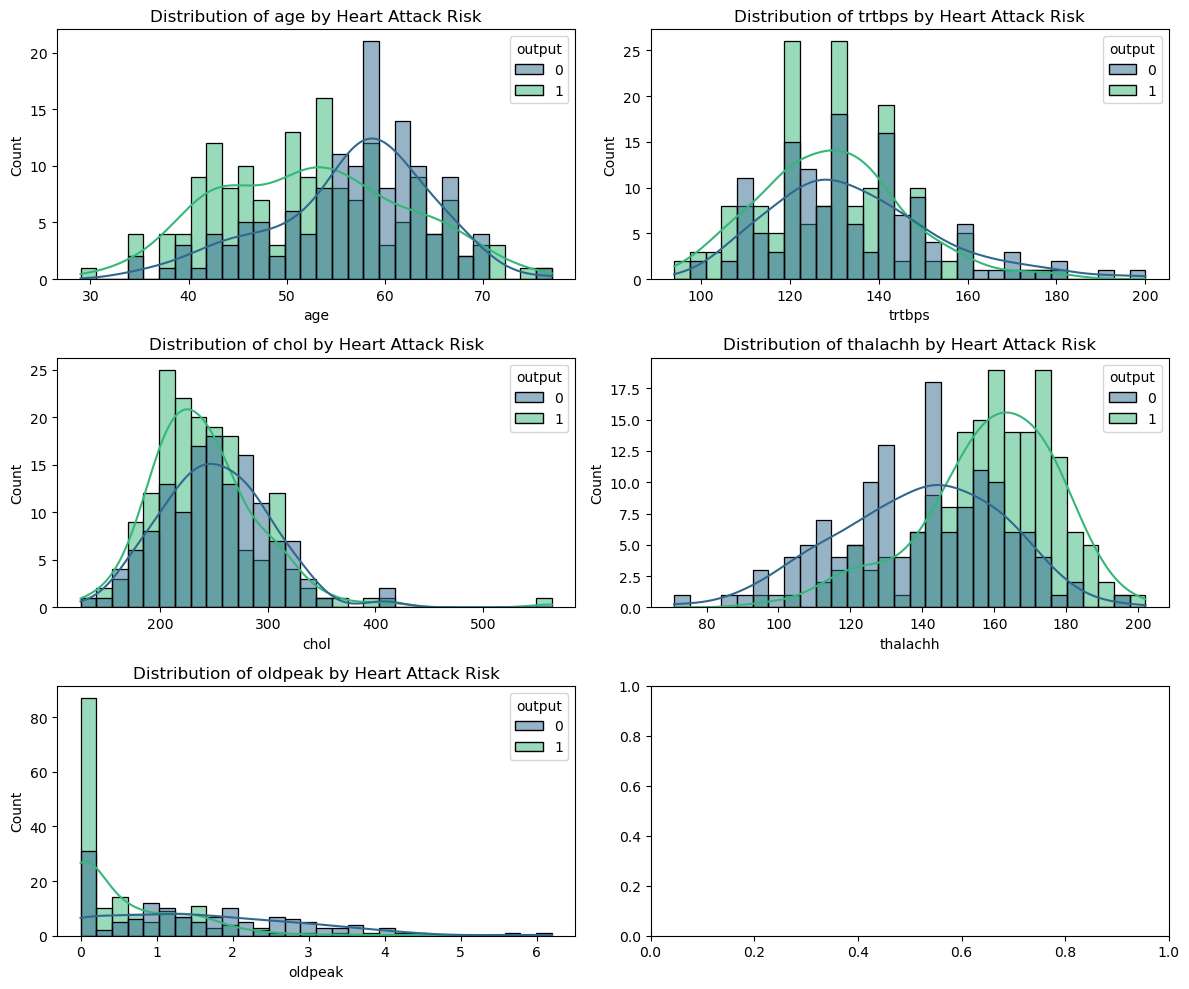

In [21]:
# Set up subplots for distribution plots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Create distribution plots for each continuous variable
for col, ax in zip(continuous_cols, axes.flatten()):
    sns.histplot(data=df, x=col, hue="output", kde=True, palette="viridis", ax=ax, bins=30)
    ax.set_title(f"Distribution of {col} by Heart Attack Risk")

plt.tight_layout()
plt.show()

# Age: Heart attack risk increases with age, with more cases in the 50+ range.
# Resting Blood Pressure (trtbps): No strong separation between the two groups.
# Cholesterol (chol): No clear pattern in cholesterol levels.
# Maximum Heart Rate (thalachh): Higher heart rates are more associated with a lower risk.
# Oldpeak: Higher values seem linked to a greater heart attack risk.

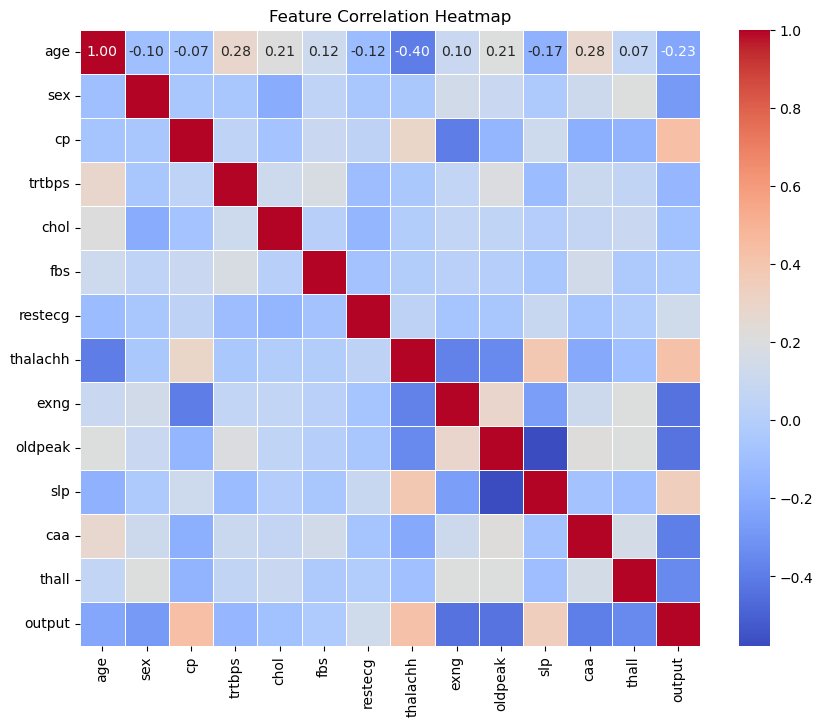

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# High correlation between thalachh (max heart rate) and heart attack risk (output) (negative correlation).
# oldpeak (previous peak) is positively correlated with heart attack risk.
# Moderate correlation between cp (chest pain type) and heart attack risk.
# Some features like chol and trtbps have low correlation with the target variable, suggesting they may not be strong predictors.

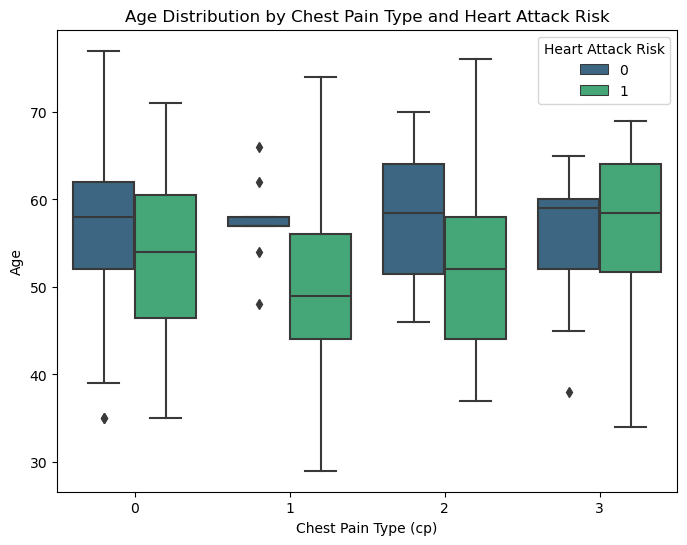

In [27]:
# Additional visualization: Relationship between age and chest pain type (cp)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["cp"], y=df["age"], hue=df["output"], palette="viridis")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Age")
plt.title("Age Distribution by Chest Pain Type and Heart Attack Risk")
plt.legend(title="Heart Attack Risk")
plt.show()

# Younger individuals with typical angina (cp=0) are less likely to have a heart attack.
# Higher chest pain types (cp=2,3) are more common among older individuals at higher risk.

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



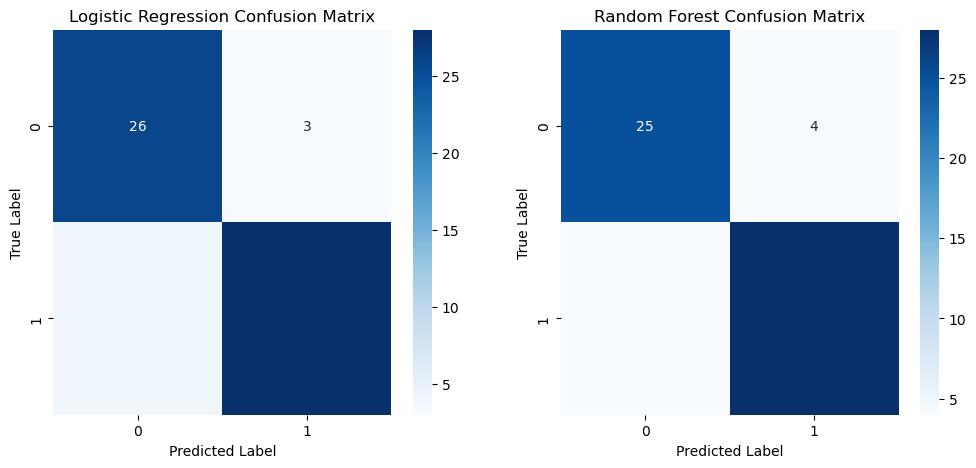

0.12.2


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define categorical and continuous columns
categorical_cols = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

# Define preprocessing: One-hot encode categorical, scale continuous
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), continuous_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

# Define models
log_reg = Pipeline([("preprocessor", preprocessor), ("classifier", LogisticRegression())])
rf_clf = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))])

# Split data
X = df.drop(columns=["output"])
y = df["output"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Classification reports
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)

# Confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display results
print("Logistic Regression Classification Report:\n", report_log_reg)
print("Random Forest Classification Report:\n", report_rf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.show()
print(sns.__version__)  # Should be 0.11 or later

# We analyzed health data to predict heart attack risk (binary classification) and 
# applied one-hot encoding for categorical variables and Z-score scaling for continuous 
# features. We chose Logistic Regression for its interpretability and Random Forest for 
# its ability to capture non-linear patterns. Logistic Regression performed slightly better 
# in accuracy and balance between false positives and false negatives, while Random Forest
# remained robust. Further improvements could include hyperparameter tuning and testing
# additional models like SVM or Neural Networks.

In [ ]:
# the heatmap and the above dont print completely in the online version of anaconda but work fine when run in other ides